In [1]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
def kmeans_display(X, label):
    #return maximun of label values and plus by 1
    #cause we have label 0 here
    K = np.amax(label) + 1
    
    X_show = []
    
    for i in range(K):
        X_show.append(X[label == i, :])
    
    for X_element in X_show:
        plt.plot(X_element[:, 0], X_element[:, 1], 'o')
        
    plt.show()

# K MEANS

In [5]:
class kMeans:
    
    '''Khởi tạo Object kMeans với 2 tham số data và số lớp k'''
    def __init__(self, data, K=2):
        
        if(K >X.shape[0]):
            
            raise ValueError('k is %d need to less than or equal to %d' % (k,X.shape[0]))
        
        else:
            self.data = data
            self.K = K 
            self.labels = None
            self.centers = None
            self.new_labels = None
            self.new_centers = None
            
            
    def get_init_index(self):
        # randomly pick k rows of X as initial centers
        data_len = self.data.shape[0]
        indexs_ = np.random.choice(data_len, self.K, replace=False)
        return indexs_
            
    def kmeans_assign_labels(self):
        # calculate pairwise distances btw data and centers
        D = cdist(self.data, self.new_centers)
        # return index of the closest center
        self.new_labels = np.argmin(D, axis = 1) #return indexs of minimun value by row
        
    def kmeans_update_centers(self):
        centers_ = np.zeros((self.K, self.data.shape[1]))
        for k_ in range(self.K):
            # collect all points assigned to the k-th cluster 
            Xk = self.data[self.labels[-1] == k_ , :]
            # take average
            centers_[k_,:] = np.mean(Xk, axis = 0)
        self.new_centers = centers_
    
    '''Nếu như tập điểm mới trùng với cái cũ thì dừng lại'''
    def has_converged(self):
        return (set([tuple(a) for a in self.centers[-1]]) == set([tuple(a) for a in self.new_centers]))
    
    
    def run(self):
        self.itera = 0 
        self.labels = []
        self.centers = []
        
        '''Bước 1: Chọn ngẫu nhiên k dữ liệu để đại diện cho k nhóm'''
        self.new_centers = self.data[self.get_init_index()]
        self.centers.append(self.new_centers)
        
        while True:
            '''Bước 2: Tính toán khoảng cách của các điểm dữ liệu'''
            '''và gán nhãn cho chúng với khoảng cách so với center nào là bé nhất'''
            self.kmeans_assign_labels()
            self.labels.append(self.new_labels)
            
             '''Bước 3: Tính mean cho từng cluster và cập nhật lại center'''
            self.kmeans_update_centers()
            
            '''Bước 4: kiểm tra bộ center mới cập nhật có bị trùng với bộ trước hay không'''
            '''Nếu không quay lại Bước 2'''
            if self.has_converged():
                break
            self.centers.append(self.new_centers)
            self.itera += 1
            
    
    def result(self):
        if self.labels is not None:
            return (self.centers, self.labels, self.itera)
        else:
            raise SytaxError('you don not have any result to get, check that at least you have call run() function one time.')


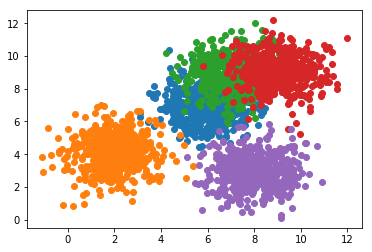

In [22]:
K = 5
cov = [[1, 0], [0, 1]]
N = 500
X_element = []
X = None
original_label = None

for i in range(K):
    means = [random.randint(1,9),random.randint(1,9)]
    X_new = (np.random.multivariate_normal(means, cov, N))
    try:
        X = np.concatenate((X, X_new), axis = 0)
    except:
        X = X_new
    try:
        original_label = np.concatenate((original_label, np.asarray([i]*N, dtype='int32')), axis = 0)
    except:
        original_label = np.asarray([i]*N, dtype='int32')
original_label = original_label.T
# np.random.shuffle(X)
kmeans_display(X, original_label)

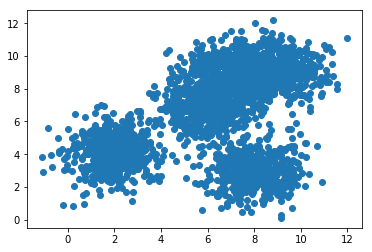

In [23]:
plt.plot(X[:,0], X[:,1], 'o')

Centers found by our algorithm:
[[9.18654732 9.03548754]
 [1.94270064 4.09441226]
 [6.86040614 9.18333521]
 [6.02585584 6.8718014 ]
 [7.97145101 2.99826036]]


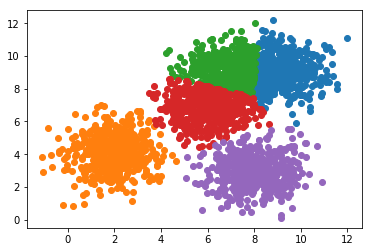

In [24]:
kmeans = kMeans(X, K)
kmeans.run()
(centers, labels, it) = kmeans.result()

print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X, labels[-1])